# <a id='toc1_'></a>[Assignment II](#toc0_)

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})
from HANKModel import create_model

**Table of contents**<a id='toc0_'></a>    
- [Assignment II](#toc1_)    
  - [Q1](#toc1_1_)    
  - [Q2](#toc1_2_)    
  - [Q3](#toc1_3_)    
  - [Q4](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Q1](#toc0_)

Setup

In [4]:
hank = create_model(name='baseline', par={'HH_type' : 'HANK'})

Steady state 

In [5]:
hank.find_ss(do_print=False)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


steady state found in 6.3 secs
 beta =   0.9744
 r    =   0.0200
 B   =   2.6308
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [6]:
hank.test_path()

shocks: epsT 
unknowns: pi L B w 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production
  Y                0.0e+00
  NKPC_res         0.0e+00 [target]
  profits          0.0e+00
 blocks.central_bank
  r                0.0e+00
 blocks.government
  Taxes            0.0e+00
  gov_budget       0.0e+00 [target]
  LT               0.0e+00
 hh
  A_hh             1.5e-09
  C_hh             6.6e-11
  MUC_hh           2.2e-10
 blocks.labor_supply
  labor_supply_res  1.3e-10 [target]
 blocks.market_clearing
  A                0.0e+00
  clearing_A       1.5e-09
  clearing_Y       4.4e-11 [target]


Transition path

In [7]:
hank.compute_jacs(do_print=False)
hank.find_transition_path(shocks=['epsT'],do_print=False, do_end_check=False)


In [10]:
def compute_DSF(model):
    models = {}
    DSF = {}
    for H in [0, 20, 40]:
        models[H] = model.copy(name=f'H={H}')
        par, ss, path = models[H].par, models[H].ss, models[H].path
        par.H = H
        models[H].compute_jacs(do_print=False)
        models[H].find_transition_path(shocks=['epsT'],do_print=False, do_end_check=False)

        dYt = path.Y[:,0] - ss.Y
        dB0 = path.B[0,0] - ss.B
        q = (1+ss.r) ** (-np.arange(par.T)) # NPV vector

        DSF[H] = (q @ (par.tau * dYt))/ dB0

    for key, val in DSF.items():
        print(f'DSF for H={key} is {val:.4f}')

    return models, DSF

In [11]:
hank_h, DSF_hank = compute_DSF(hank)

DSF for H=0 is -0.0001
DSF for H=20 is 0.1060
DSF for H=40 is 0.3102


### shocks ###


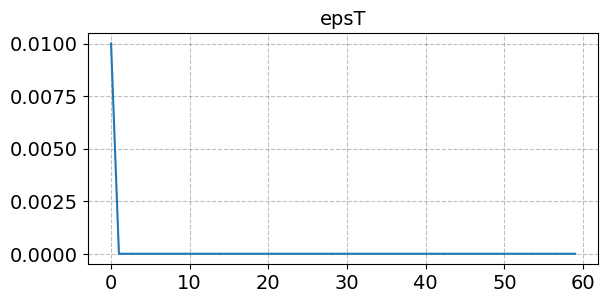


### varnames ###


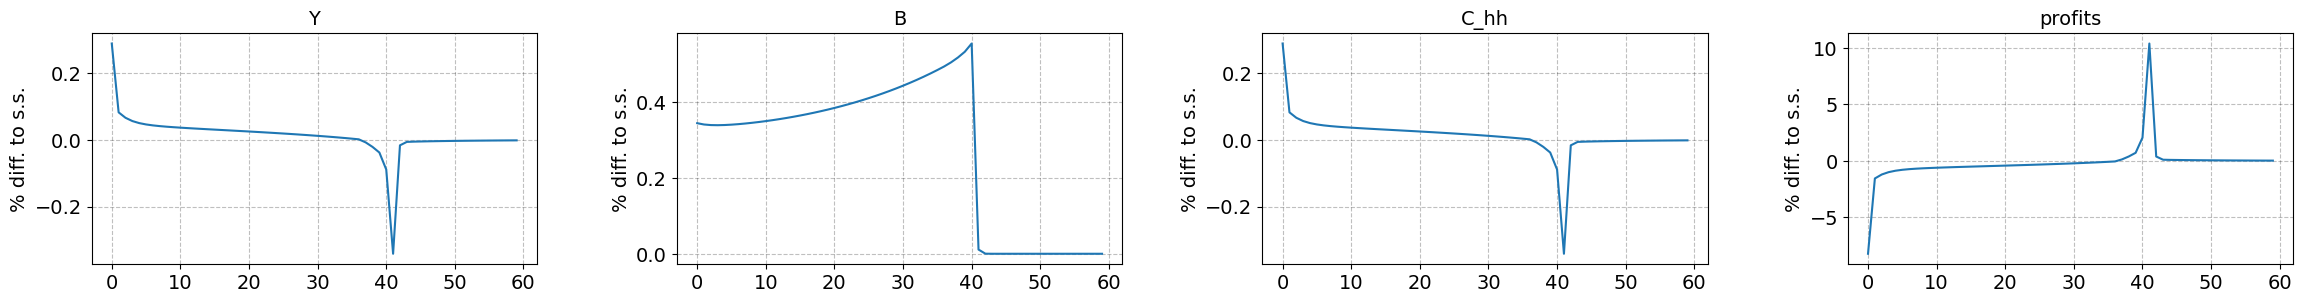


### tagets ###


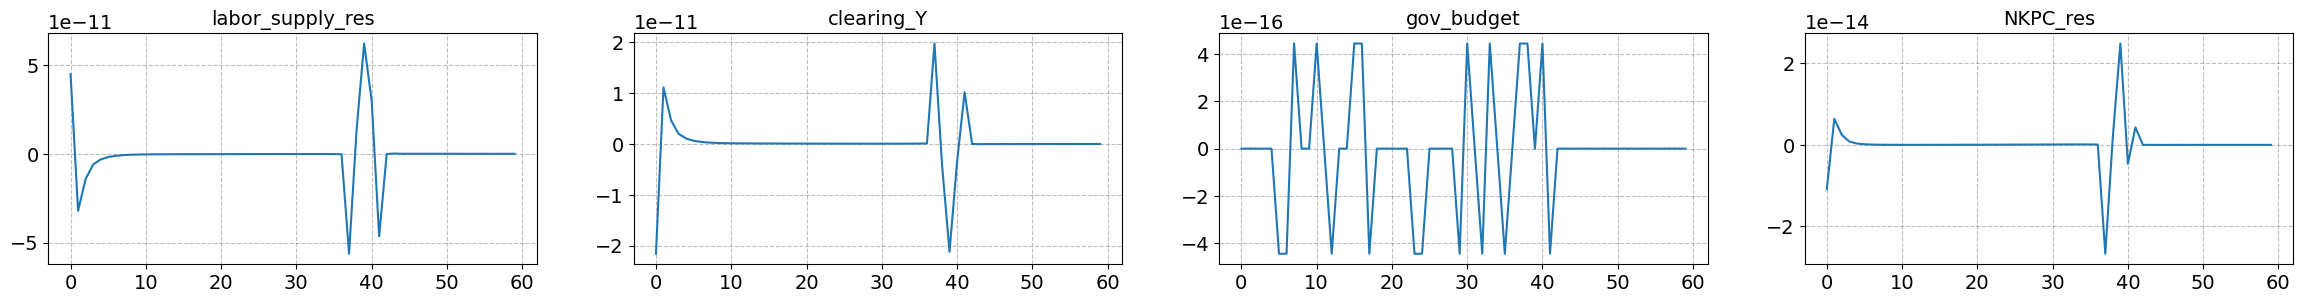

In [13]:
vars = ['Y', 'B', 'C_hh', 'profits']
hank_h[40].show_IRFs(vars, lvl_value=['epsT', 'pi'], T_max=60, )

## <a id='toc1_2_'></a>[Q2](#toc0_)

In [14]:
tank = create_model(name='TANK', par={'HH_type' : 'TANK'})
tank.par.beta = 1/(1+hank.ss.r)
tank.par.B_target_ss = hank.ss.B

tank.find_ss(calibrate=False, do_print=False)
tank.compute_jacs(do_print=False)
tank.test_path()
tank.find_transition_path(shocks=['epsT'],do_print=False, do_end_check=False)

steady state found in 0.0 secs
 beta =   0.9804
 r    =   0.0200
 B   =   2.6308
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000
shocks: epsT 
unknowns: pi L B w 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production
  Y                0.0e+00
  NKPC_res         0.0e+00 [target]
  profits          0.0e+00
 blocks.central_bank
  r                0.0e+00
 blocks.government
  Taxes            0.0e+00
  gov_budget       0.0e+00 [target]
  LT               0.0e+00
 blocks.TA_HHs
  C_hh             0.0e+00
  A_hh             0.0e+00
  MUC_hh           0.0e+00
  C_R              0.0e+00
  C_HtM            0.0e+00
 blocks.labor_supply
  labor_supply_res  0.0e+00 [target]
 blocks.market_clearing
  A                0.0e+00
  clearing_A       0.0e+00
  clearing_Y       0.0e+00 [target]


### shocks ###


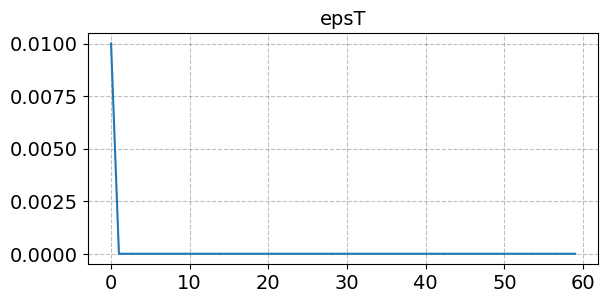


### varnames ###


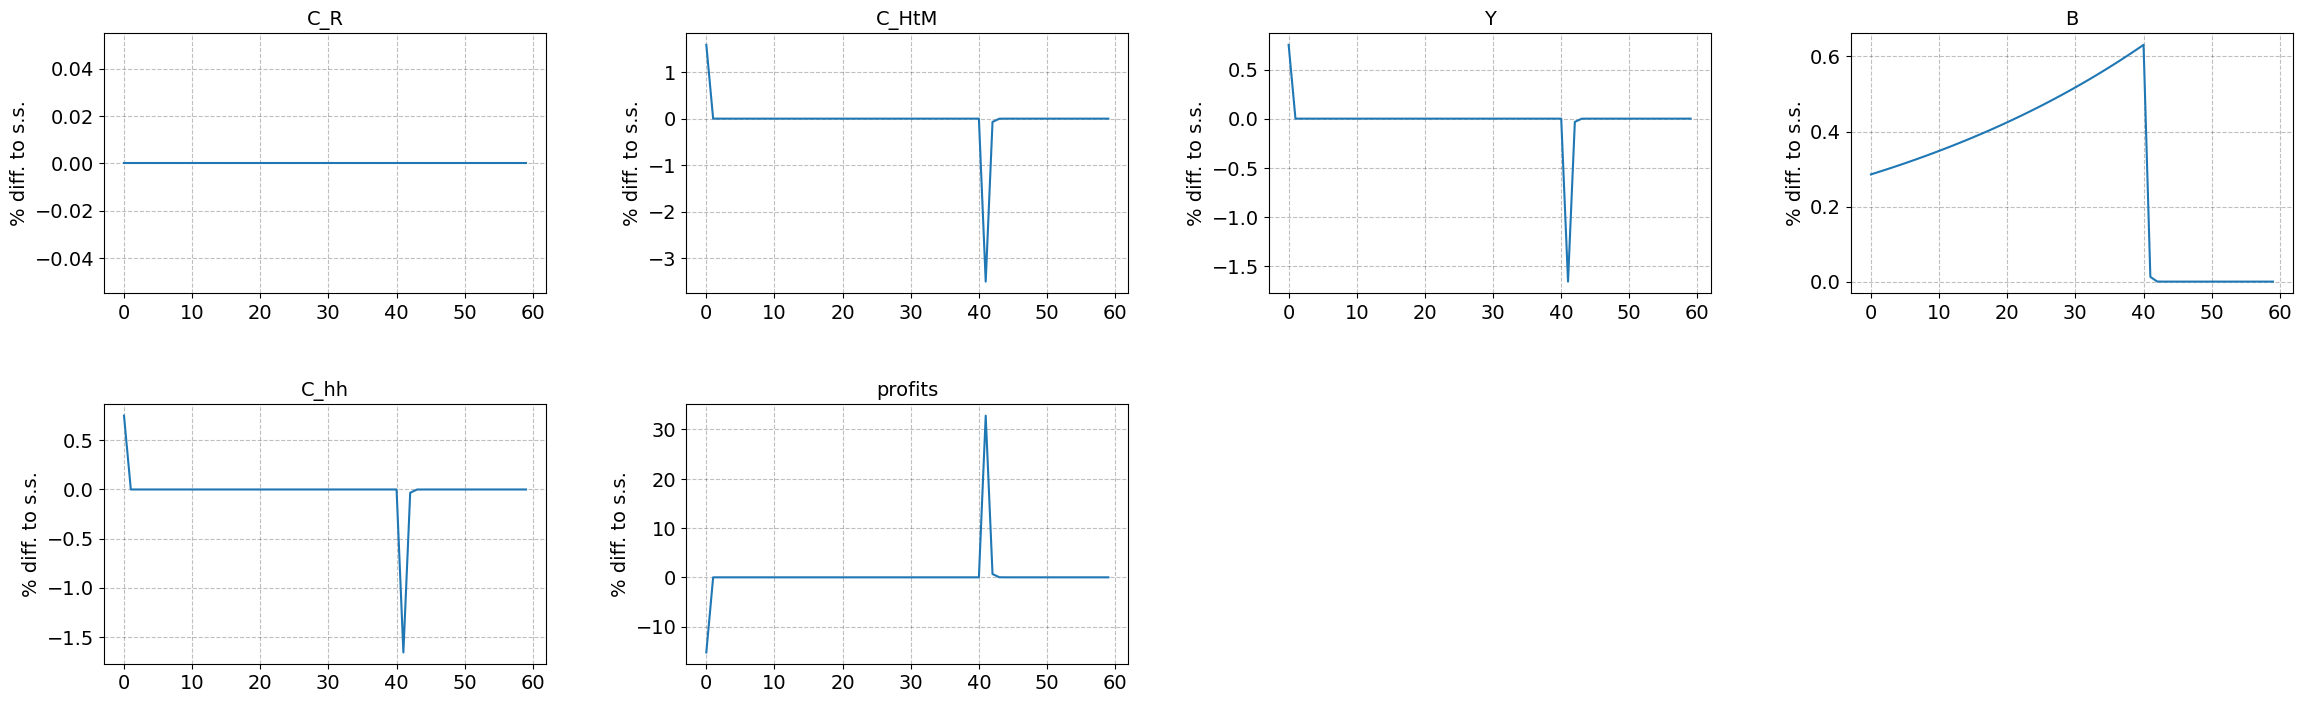


### tagets ###


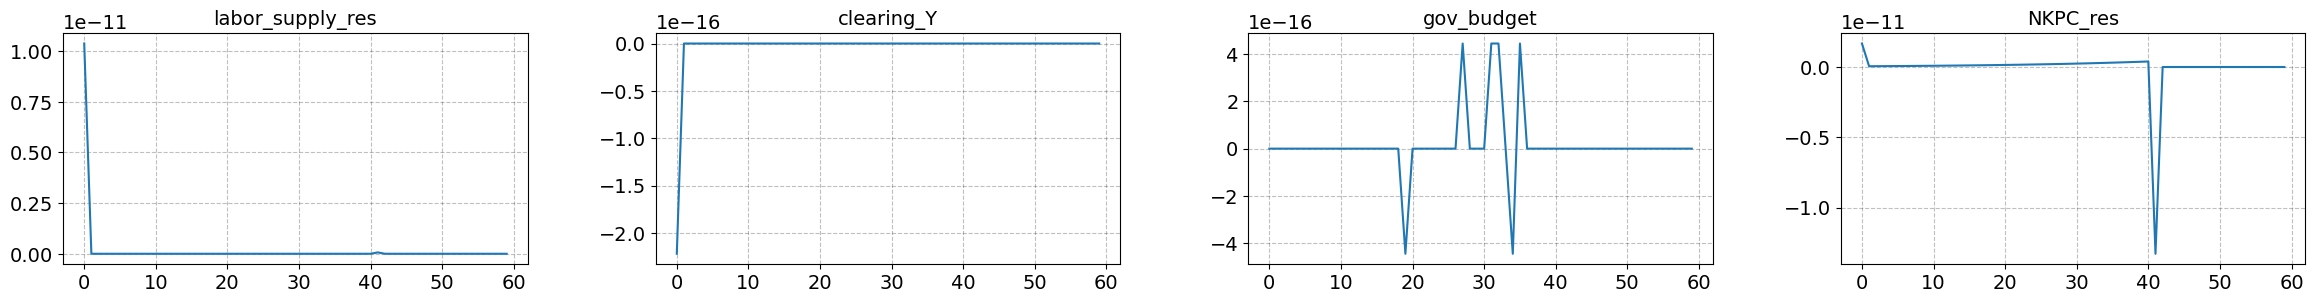

In [15]:
tank.show_IRFs(['C_R', 'C_HtM', 'Y', 'B', 'C_hh', 'profits', ], lvl_value=['epsT'], T_max=60)

In [16]:
tank_H, DSF_tank = compute_DSF(tank)

DSF for H=0 is -0.0000
DSF for H=20 is -0.0000
DSF for H=40 is -0.0000


## <a id='toc1_3_'></a>[Q3](#toc0_)

HANK model with low tax rate

In [27]:
hank_low_tau = hank.copy() 
hank_low_tau.par.tau = 0.05
hank_low_tau.find_ss(do_print=False, x0=[0.967, 2.341])
hank_low_tau.compute_jacs()
hank_low_tau.find_transition_path(['epsT'])


steady state found in 4.6 secs
 beta =   0.9693
 r    =   0.0200
 B   =   2.4587
Discrepancy in A =  -0.00000000
Discrepancy in Y =  -0.00000000
clearing_A: terminal value is  -0.00000079, but ss value is  -0.00000000


### shocks ###


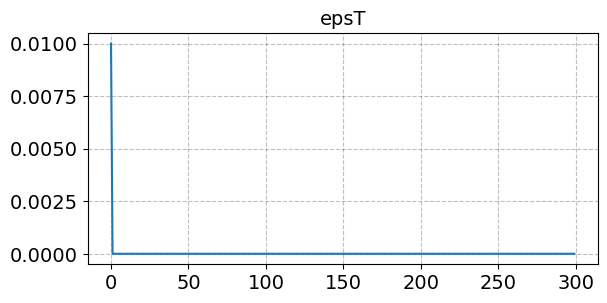


### varnames ###


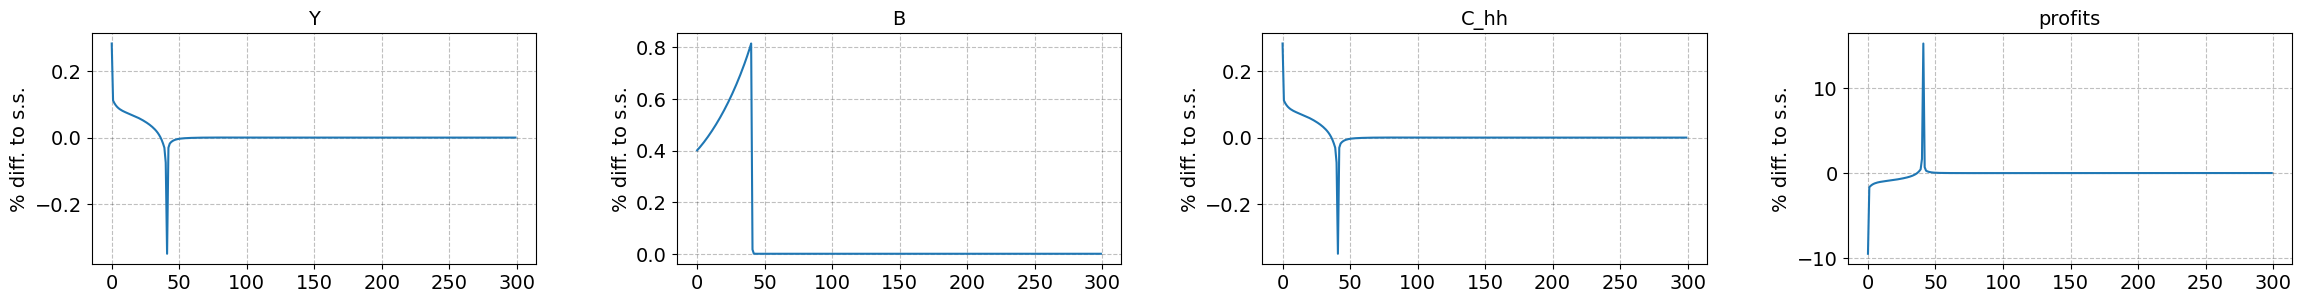


### tagets ###


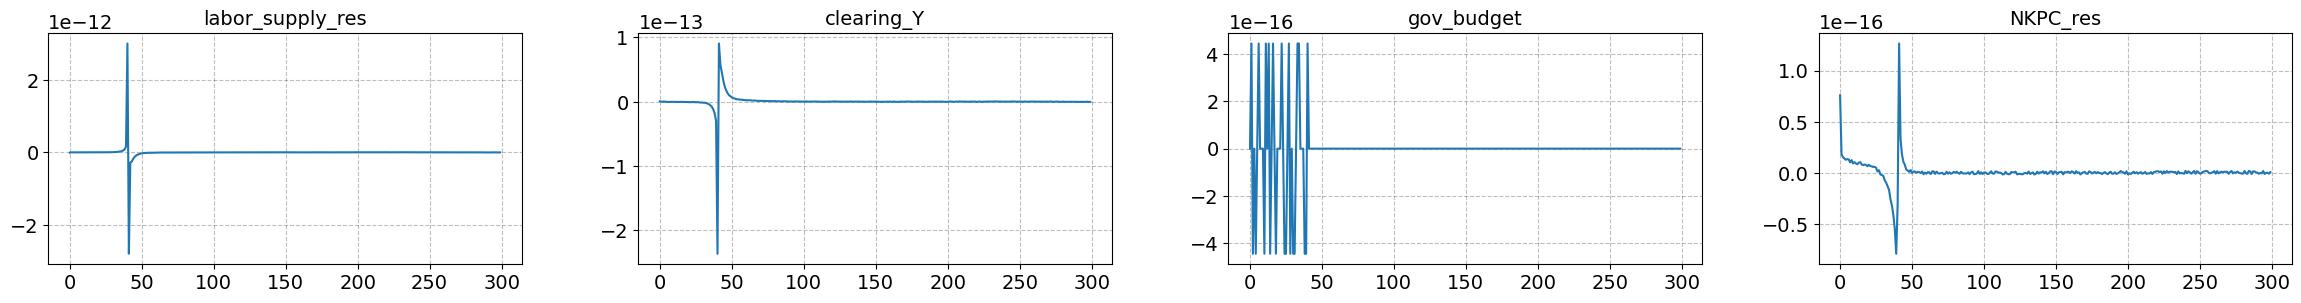

In [28]:
hank_low_tau.show_IRFs(['Y', 'B', 'C_hh', 'profits'], lvl_value=['epsT'])

In [29]:
hank_low_tau_h, DSF_low_tau = compute_DSF(hank_low_tau)

DSF for H=0 is 0.0001
DSF for H=20 is 0.0249
DSF for H=40 is 0.0837


## <a id='toc1_4_'></a>[Q4](#toc0_)

In [30]:
hank_active = hank.copy()
hank_active.par.phi_Y = 0.5
hank_active.find_ss(do_print=False)
hank_active.compute_jacs()
hank_active.find_transition_path(['epsT'])


steady state found in 4.1 secs
 beta =   0.9744
 r    =   0.0200
 B   =   2.6308
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000
clearing_A: terminal value is   0.00000017, but ss value is   0.00000000


### shocks ###


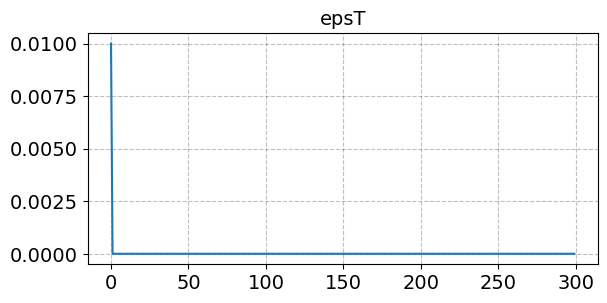


### varnames ###


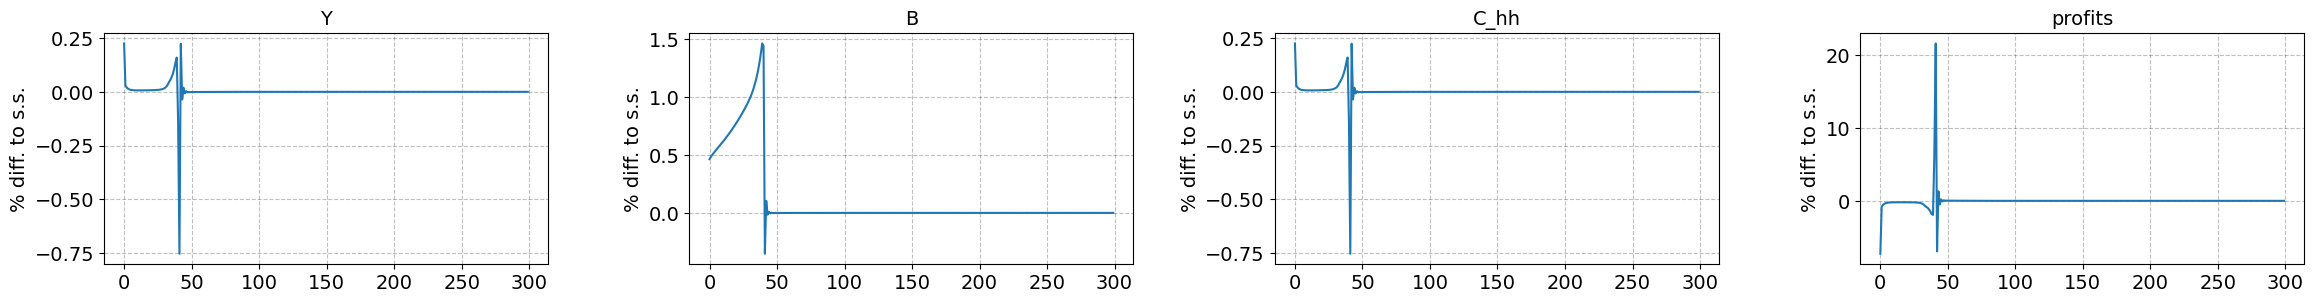


### tagets ###


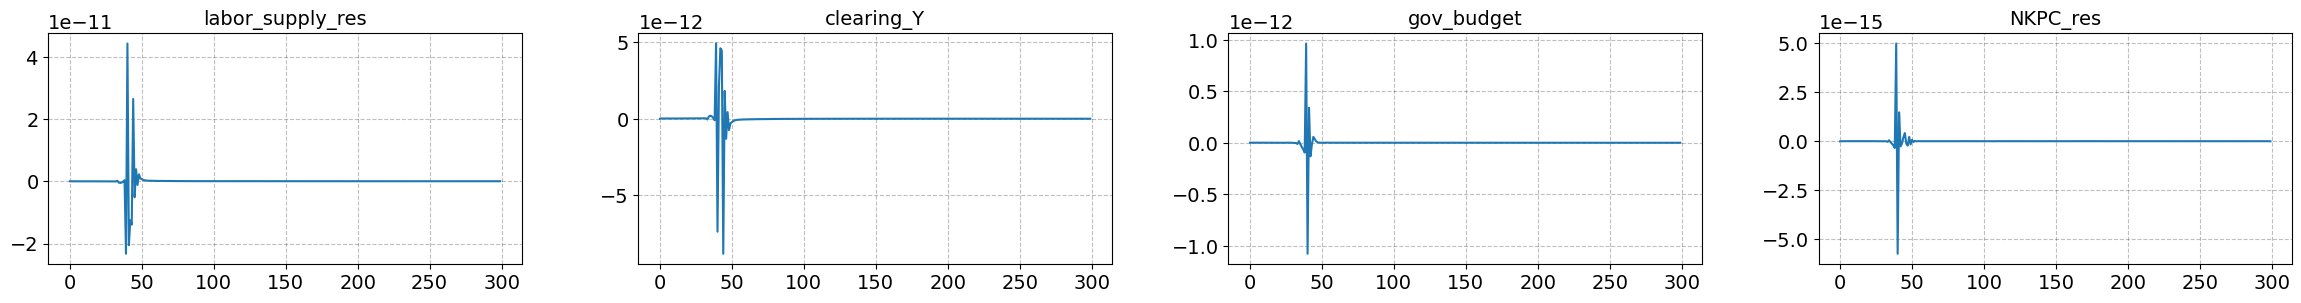

In [31]:
hank_active.show_IRFs(['Y', 'B', 'C_hh', 'profits'], lvl_value=['epsT'])

In [32]:
hank_active_h, DSF_active = compute_DSF(hank_active)

DSF for H=0 is 0.0055
DSF for H=20 is 0.0997
DSF for H=40 is 0.1271


In [33]:
hank_high_kappa = hank_active.copy(name='high_kappa')
hank_high_kappa.par.kappa = 0.05
hank_high_kappa.find_ss(do_print=False)
hank_high_kappa.compute_jacs(do_print=False)
hank_high_kappa.find_transition_path(shocks=['epsT'],do_print=False, do_end_check=False)


steady state found in 4.6 secs
 beta =   0.9744
 r    =   0.0200
 B   =   2.6308
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [34]:
hank_high_kappa_h, DSF_high_kappa = compute_DSF(hank_high_kappa)

DSF for H=0 is 0.0055
DSF for H=20 is 0.0997
DSF for H=40 is 0.1271


### Gather all results in a table

In [35]:
import pandas as pd

       HANK          TANK  HANK: low tau  HANK: active  HANK: high kappa
0 -0.000103 -9.078762e-14       0.000057      0.005536          0.005536
1  0.105959 -1.199735e-13       0.024859      0.099690          0.099690
2  0.310166 -1.738462e-13       0.083736      0.127103          0.127103


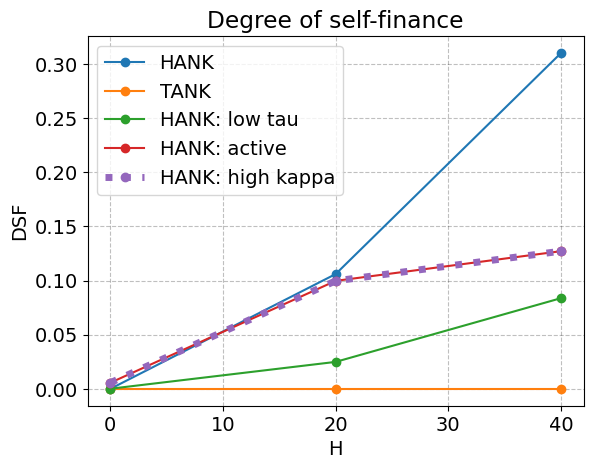

In [44]:
cols = ['HANK', 'TANK', 'HANK: low tau', 'HANK: active', 'HANK: high kappa']
DSFs = [DSF_hank, DSF_tank, DSF_low_tau, DSF_active, DSF_high_kappa]

H = [0, 20, 40]
data = {col: d.values() for (col, d) in zip(cols, DSFs)}
df = pd.DataFrame(data)


for col in df:
    if col == 'HANK: high kappa':
        plt.plot(H, df[col], label=col, marker='o', linestyle = ':', linewidth = 5)
    else:
        plt.plot(H, df[col], label=col, marker='o', )
plt.legend();
plt.xlabel('H')
plt.ylabel('DSF')
plt.title('Degree of self-finance')
print(df)